In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv
import pandas as pd
import glob
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut


In [2]:
def dicom2array(path, voi_lut=True, fix_monochrome=True):
    '''
    function to convert DICOM images into np.array.
    :param path: path of the DICOM image.
    :param VOI LUT: used to transform DICOM data to more simpler data.
    :param fix_monochrome: used to fix the inversion of X-Ray images.
    :return: the Grayscale image converted to np.array format from DICOM format. 
    '''
    dicom = pydicom.read_file(path)
    # VOI LUT (if available by DICOM device) is used to
    # transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    
    return data

In [3]:
imageLevelDf = pd.read_csv('./data/train_image_level.csv')

In [4]:
imageLevelDf.head()

,id,boxes,label,StudyInstanceUID
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e


In [13]:
def drawResult(data, boxes, label):
    fig, ax = plt.subplots()
    ax.imshow(data)
    if label[0:4]!='none':
        for box in eval(boxes):
            x, y, w, h = box.values()
            ax.add_patch(patches.Rectangle((x, y),w,h,edgecolor='r',fill=False))

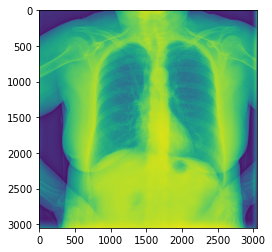

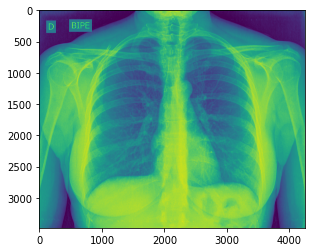

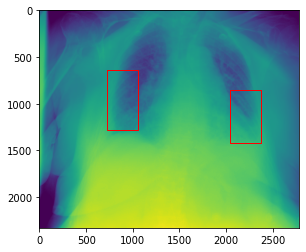

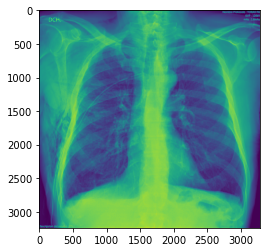

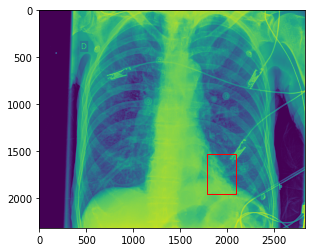

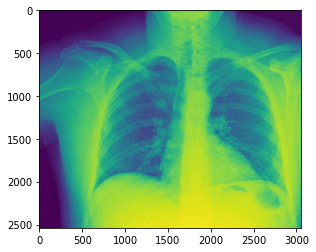

In [17]:
trainDcm = glob.glob('./data/train/*.dcm')
for path in trainDcm:
    result = path.split('\\')[-1].split(".")[0] + '_image'
    boxes = imageLevelDf.loc[imageLevelDf['id'] == result]['boxes'].values[0]
    label = imageLevelDf.loc[imageLevelDf['id'] == result]['label'].values[0]
    stdID = imageLevelDf.loc[imageLevelDf['id'] == result]['StudyInstanceUID'].values[0]
    drawResult(dicom2array(path), boxes, label)